## 머신러닝
# 보스턴 주택가격 선형회귀분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 불러오기

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston() # D:\Anaconda3\Lib\site-packages\sklearn\datasets\data

In [4]:
boston.data.shape # 속성이 13개

(506, 13)

In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston.target # 주택 가격

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X = boston.data
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
y = boston.target # 집가격
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
y_pred # 예측값 출력

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

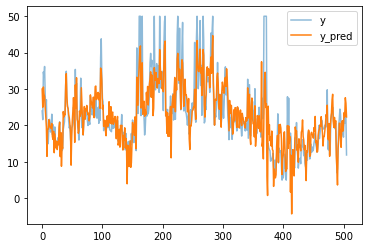

In [13]:
plt.plot(y, alpha=0.5)
plt.plot(y_pred)
plt.legend(['y', 'y_pred'])

In [14]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

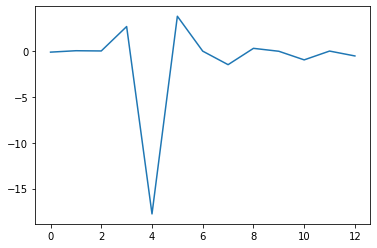

In [15]:
plt.plot(model.coef_)

### 데이터 정규화가 필요함
- 각 속성의 값의 스케일이 크게 다름
- 값이 큰 속성의 값이 훈련시 큰 영향을 주게 됨
- 각 속성의 값을 비슷한 크기로 조절이 필요

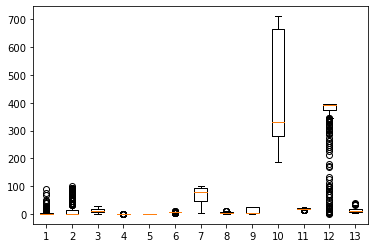

In [7]:
plt.boxplot(boston.data)
pass

- 표준정규화(Standard Normalization) : 각 속성의 평균값을 빼고, 표준편차로 나누어 준다

In [8]:
X = boston.data
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

In [9]:
X_norm.shape

(506, 13)

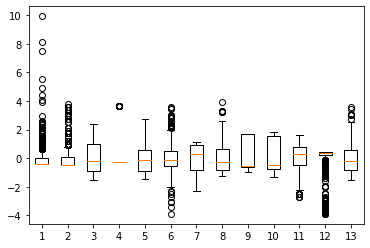

In [11]:
plt.boxplot(X_norm)
pass

### 해결하려는 문제는 무엇인가?
> 주택가격에 영향을 주는 13가지 속성값을 이용해 주택가격을 예측하고 싶다

In [16]:
X = boston.data
X_norm = (X - X.mean(axis=0))/X.std(axis=0)
X_norm.shape

(506, 13)

In [17]:
y = boston.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

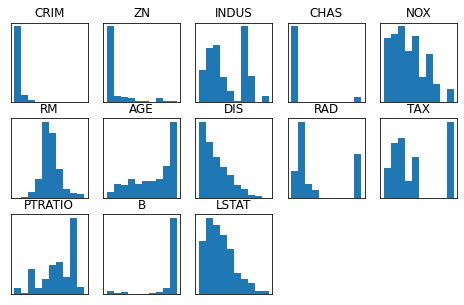

In [22]:
plt.figure(figsize=[8,5])
for i in range(13):
    plt.subplot(3,5,i+1)
    plt.hist(X_norm[:,i])
    plt.title(boston.feature_names[i])
    plt.xticks([])
    plt.yticks([])

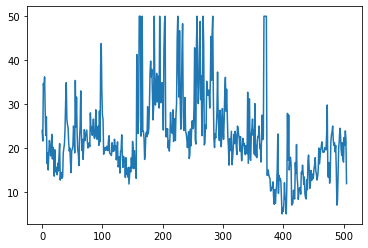

In [14]:
plt.plot(y)

### 선형회귀 적용

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_norm, y) # X_norm 을 사용해야 함

LinearRegression()

In [21]:
y_pred = model.predict(X_norm)

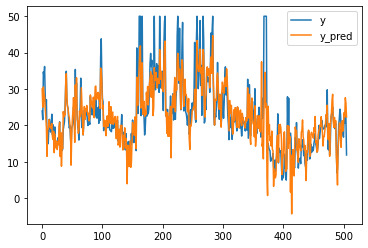

In [22]:
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y', 'y_pred'])

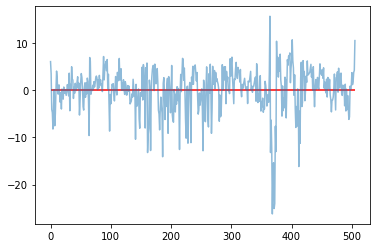

In [23]:
plt.plot(y_pred - y, alpha=0.5) # 예측오차
plt.hlines([0], colors='red', xmax=505, xmin=0)

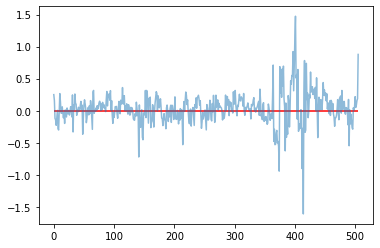

In [29]:
plt.plot((y_pred - y)/y, alpha=0.5) # 예측오차비율
plt.hlines([0], colors='red', xmax=505, xmin=0)

In [31]:
### mean squared error
mse = ((y-y_pred)**2).mean()
mse

21.8948311817292

In [32]:
### mean absolute error
mae = np.abs(y-y_pred).mean()
mae

3.2708628109003155

In [33]:
### coefficient of determination `R^2`
model.score(X_norm, y)

0.7406426641094095

### 결과 분석

In [24]:
model.coef_

array([-0.92814606,  1.08156863,  0.1409    ,  0.68173972, -2.05671827,
        2.67423017,  0.01946607, -3.10404426,  2.66221764, -2.07678168,
       -2.06060666,  0.84926842, -3.74362713])

In [25]:
model.intercept_

22.532806324110684

> - 가중치의 절대값이 클수록 주택가격 예측에 큰 영향을 준다
> - 양수면 양의 효과, 음수면 음의 효과

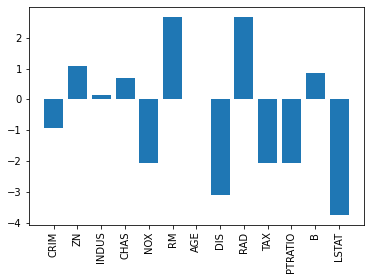

In [40]:
plt.bar(range(13), model.coef_)
plt.xticks(range(13), boston.feature_names, rotation=90)
pass

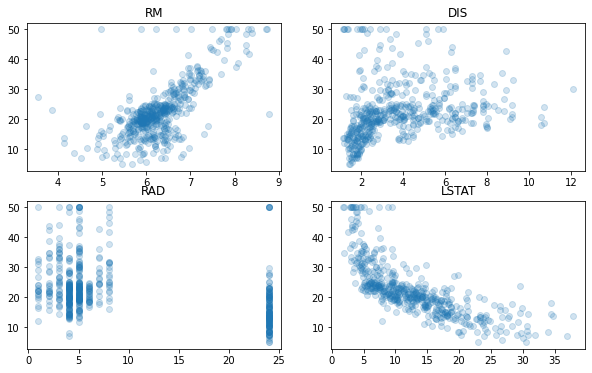

In [41]:
### 가중치 값이 큰 속성들과 목표값의 산점도
plt.figure(figsize=[10,6])

plt.subplot(2,2,1)
plt.title(boston.feature_names[5])
plt.scatter(X[:,5], y, alpha=0.2)
plt.subplot(2,2,2)
plt.title(boston.feature_names[7])
plt.scatter(X[:,7], y, alpha=0.2)
plt.subplot(2,2,3)
plt.title(boston.feature_names[8])
plt.scatter(X[:,8], y, alpha=0.2)
plt.subplot(2,2,4)
plt.title(boston.feature_names[12])
plt.scatter(X[:,12], y, alpha=0.2)

### 상관계수 분석
- correlation coefficient : https://en.wikipedia.org/wiki/Correlation
> 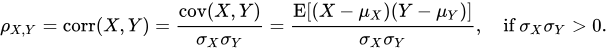
- 양의상관관계: 1, 음의상관관계: -1, 상관없음: 0
> 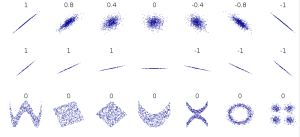

In [42]:
np.c_[X, y].shape

(506, 14)

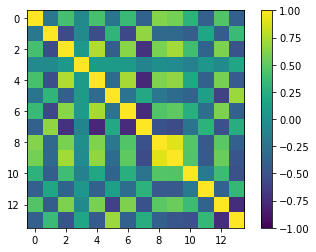

In [97]:
a = np.corrcoef((np.c_[X, y]).T)
plt.imshow(a, vmin=-1, vmax=1)
plt.colorbar()

In [35]:
a[-1]

array([-0.38830461,  0.36044534, -0.48372516,  0.17526018, -0.42732077,
        0.69535995, -0.37695457,  0.24992873, -0.38162623, -0.46853593,
       -0.50778669,  0.33346082, -0.73766273,  1.        ])

### 5번 속성(RM)만 이용한 선형회귀

In [47]:
X2 = boston.data[:, 5].reshape(-1,1) # 입력값은 2차원이어야 함
X2.shape

(506, 1)

In [48]:
y.shape

(506,)

In [49]:
model2 = LinearRegression()
model2.fit(X2, y)
y_pred2 = model2.predict(X2)

In [51]:
model2.coef_, model2.intercept_

(array([9.10210898]), -34.670620776438554)

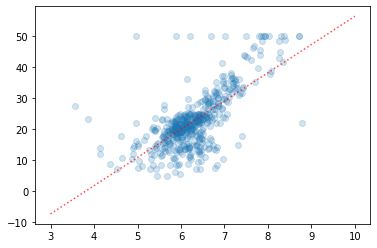

In [54]:
plt.scatter(X2.ravel(), y, alpha=0.2)

xs = np.array([3,10])
ys = xs*model2.coef_[0] + model2.intercept_
plt.plot(xs, ys, 'r:', alpha=0.7)